In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical #cate all
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


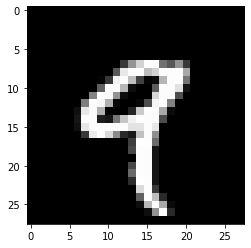

In [4]:
plt.imshow(X_train[y_train == 9][0], cmap='gray')

In [5]:
samples = []
for i in range(10):
    samples.append((X_train[y_train==i]).shape[0])

In [6]:
samples

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

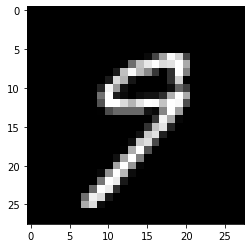

In [7]:
plt.imshow(X_train[y_train == 9][5948], cmap='gray')

In [8]:
y_train[59990:59999]

array([9, 2, 9, 5, 1, 8, 3, 5, 6], dtype=uint8)

In [9]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [10]:
y_train[59990:59999]

array([9, 2, 9, 5, 1, 8, 3, 5, 6], dtype=uint8)

In [11]:
# flatten
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
print(X_train.shape)
print(X_test.shape)

X_train = X_train/255
X_test = X_test/255


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
def LeNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5,5) , input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [14]:
model = LeNet_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [15]:
history = model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 33s 605us/step - loss: 0.2099 - accuracy: 0.9311 - val_loss: 0.0463 - val_accuracy: 0.9862
Epoch 2/10
54000/54000 [==============================] - 31s 573us/step - loss: 0.0679 - accuracy: 0.9794 - val_loss: 0.0401 - val_accuracy: 0.9890
Epoch 3/10
54000/54000 [==============================] - 31s 575us/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.0413 - val_accuracy: 0.9893
Epoch 4/10
54000/54000 [==============================] - 31s 579us/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0401 - val_accuracy: 0.9888
Epoch 5/10
54000/54000 [==============================] - 35s 652us/step - loss: 0.0432 - accuracy: 0.9869 - val_loss: 0.0404 - val_accuracy: 0.9887
Epoch 6/10
54000/54000 [==============================] - 34s 636us/step - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0536 - val_accuracy: 0.9860
Epoch 7/10
54000/54000 [==============================] -

Text(0.5, 0, 'epoch')

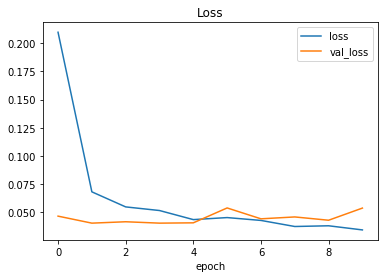

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

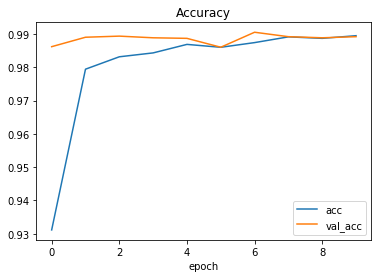

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [18]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.036206658560092024
Test accuracy: 0.9904000163078308


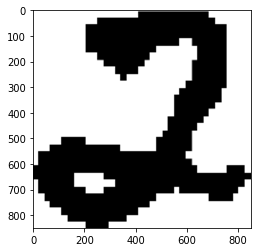

In [19]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)

plt.imshow(img)

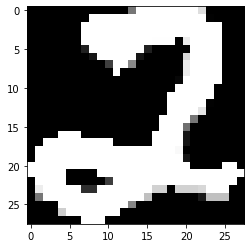

In [20]:
import cv2

img_arr = np.asarray(img)
resize = cv2.resize(img_arr, (28,28))
gray = cv2.cvtColor(resize, cv2.COLOR_RGB2GRAY)
image = cv2.bitwise_not(gray)
plt.imshow(image, cmap='gray')

In [21]:
image = image/255 #normalized
image = image.reshape(1, 28, 28, 1) #28*28 flatten

In [22]:
predection = model.predict_classes(image)
print('predected digit: ', str(predection))

predected digit:  [7]


In [24]:
#i = plt.imread('./download.png')
#i = cv2.resize(i, (28,28))
#print(type(i))
#print(i.shape)
#i = cv2.cvtColor(i, cv2.COLOR_RGB2GRAY)
#print(type(i))
#print(i.shape)
##plt.imshow(i, cmap='gray')
#i = i.reshape(1,28,28,1)
#predection = model.predict_classes(i)
#print('predected digit: ', str(predection))

predected digit:  [1]


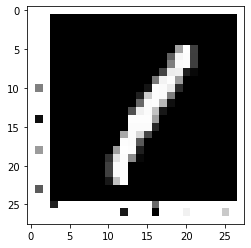

In [23]:
img_ = plt.imread('./download.png')
resized_ = cv2.resize(img_, (28,28))
cvt_ = cv2.cvtColor(resized_, cv2.COLOR_RGB2GRAY)
plt.imshow(cvt_, cmap='gray')
re_ = cvt_.reshape(1,28,28,1)
predection = model.predict_classes(re_)
print('predected digit: ', str(predection))

## **TEST**

In [24]:
cvt_ = cv2.cvtColor(cv2.resize(plt.imread('./download.png'), (28,28)), cv2.COLOR_RGB2GRAY)
#plt.imshow(cvt_, cmap='gray')
re_ = cvt_.reshape(1,28,28,1)
predection = model.predict_classes(re_)
print('predected digit: ', str(predection))

predected digit:  [1]


In [25]:
img_ = plt.imread('./download.png')
re_ = cv2.resize(img_, (28,28))#.cvtColor(cv2.COLOR_RGB2GRAY)


In [26]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
visual_layer1 , visual_layer2 = layer1.predict(image) , layer2.predict(image)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


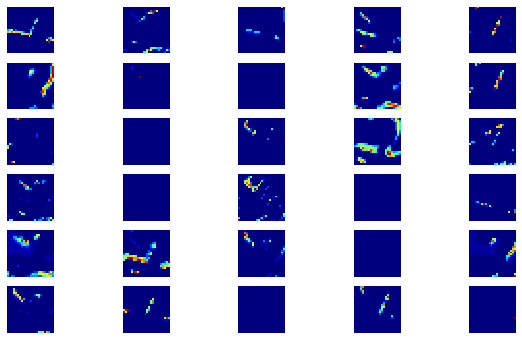

In [27]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0,:,:, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

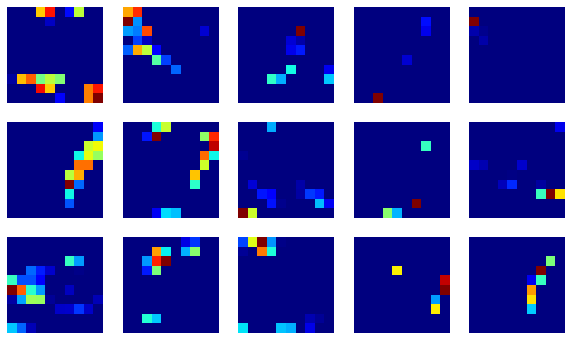

In [28]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(visual_layer2[0,:,:, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')

### COMPLETE!